# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# sklearn
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# utils
import pickle

# Data Loading

In [2]:
covid_wavelet = pd.read_csv('../dataset/covid_wavelet.csv', header=None, na_values=np.nan)

In [3]:
covid_wavelet.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,304.913188,114.282152,-0.490940,6.505846,0.057996,4.914135,-0.001125,1.174162,601.821986,228.251841,...,17.525351,2235.505877,944.946757,-20.385773,153.543635,6.264150,144.818033,0.033359,44.054483,0.0
1,318.756369,106.631873,-0.414425,4.248045,0.060874,4.948430,0.000238,1.126706,634.803804,217.408796,...,13.244787,2495.369738,944.882774,-12.028634,115.393243,4.255748,168.742803,0.022712,36.821252,0.0
2,268.808997,168.624542,-0.206295,6.625814,-0.030517,6.809613,0.001385,1.865169,522.614667,342.008983,...,19.724868,1761.329127,1441.436793,-3.224845,157.492485,2.336021,218.269413,-0.382903,54.262750,0.0
3,194.682084,87.390266,-0.207229,5.262602,-0.039098,4.937949,0.000974,1.458535,385.700297,177.579343,...,13.564710,1453.335878,766.390441,-13.115005,79.960963,-2.598222,136.032358,0.139085,35.555492,0.0
4,224.215491,102.779128,-0.416911,4.933835,0.015717,4.169780,0.002489,1.416165,442.783621,210.516611,...,12.663338,1664.781356,929.904802,-15.456335,148.717077,-0.258142,98.766601,-0.318257,32.731897,0.0


**Dataset Description** <br>
***
- Index 0 - Index 25 as features
- Index 26 as label

## Features Splitting into X (as features) and Y (as target)
***

In [4]:
X, y = covid_wavelet.drop([32],axis=1), covid_wavelet[32]

# Data Understanding

## Check label proportion

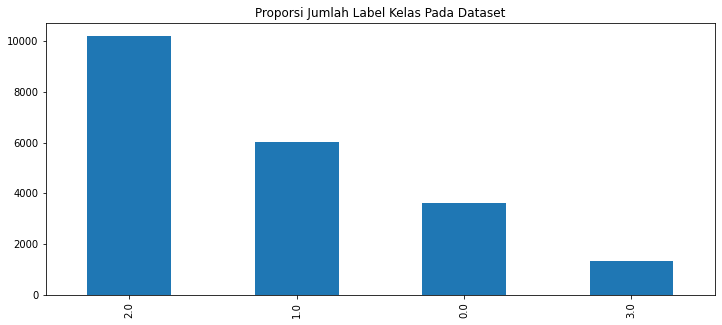

In [6]:
plt.figure(figsize=(12,5))
covid_wavelet[32].value_counts().plot(kind='bar')
plt.title('Proporsi Jumlah Label Kelas Pada Dataset')
plt.show()

**Analysis** <br>
***
- Dataset didominasi oleh kelas berlabel **3**
- Adanya imbalanced dataset

## Check number of missing values (if any)

In [8]:
covid_wavelet.isnull().sum().sum()

0

## Check duplicate value

In [9]:
covid_wavelet.duplicated().sum()

64

## Data Visualization using Principal Component Analysis and Scatter Plot
***

### calculate PCA before visualization

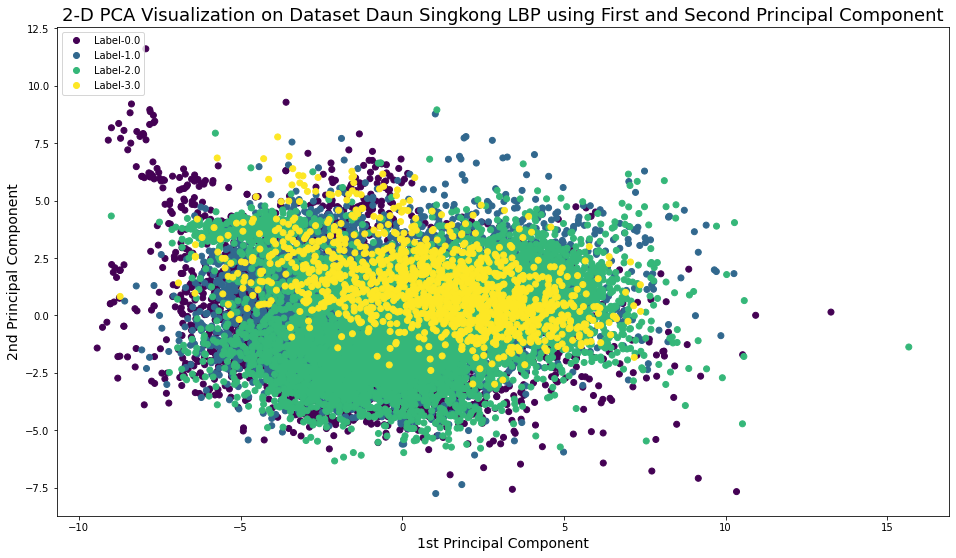

In [10]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(16,9))
Xt = pipe.fit_transform(X)
plt.title('2-D PCA Visualization on Dataset Daun Singkong LBP using First and Second Principal Component', size=18)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.xlabel('1st Principal Component', size=14)
plt.ylabel('2nd Principal Component', size=14)
plt.legend(handles=plot.legend_elements()[0], labels=['Label-'+str(i) for i in list(y.unique())], loc='upper left')
plt.show()

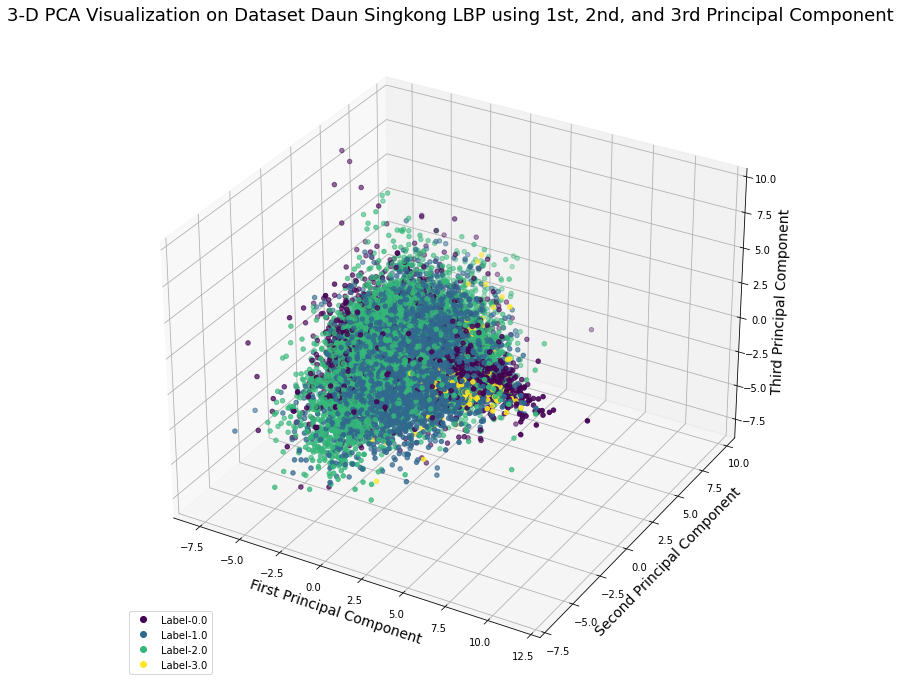

In [11]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xt[:,1], Xt[:,2], Xt[:,3], c=y)
plt.title('3-D PCA Visualization on Dataset Daun Singkong LBP using 1st, 2nd, and 3rd Principal Component', size=18)
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.legend(handles=plot.legend_elements()[0],labels=['Label-'+str(i) for i in list(y.unique())], loc='lower left')
plt.show()
plt.show()

**Analysis** <br>
Dari gambar di atas dapat disimpulkan bahwa antar data masih ada label yang saling tumpang tindih satu sama lainnya.
*Hipotesis* <br>
Mungkin ini akan berpengaruh ke performa model klasifikasi nantinya

# Data Preprocessing

## Dataset Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Min Max Normalization

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Convert label target from dataframe into numpy format

In [14]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Show Data Dimension after preprocessing
***
untuk memastikan format dimensi data yang bersesuaian <br>

In [15]:
X_train.shape, y_train.shape

((14819, 32), (14819,))

In [16]:
X_test.shape, y_test.shape

((6351, 32), (6351,))

# Save Data After Preprocessing
***
Split data menjadi training (70%) dan testing (30%) *(sesuai paper)* untuk digunakan pada tahap-tahap berikutnya. <br>
Save training and testing into pickle format

In [18]:
data_after_preprocessing = {
    'training': {
        'X': X_train,
        'y': y_train,
    },
    'testing': {
        'X': X_test,
        'y': y_test,
    }
}
# save dataset into pickle format
pickle.dump(data_after_preprocessing, open('../dataset/data_covid_after_preprocessing.pkl', 'wb'))